# Llama-3.2-1B MLP Architecture

Visualization of the MLP block from Llama-3.2-1B-Instruct model


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np


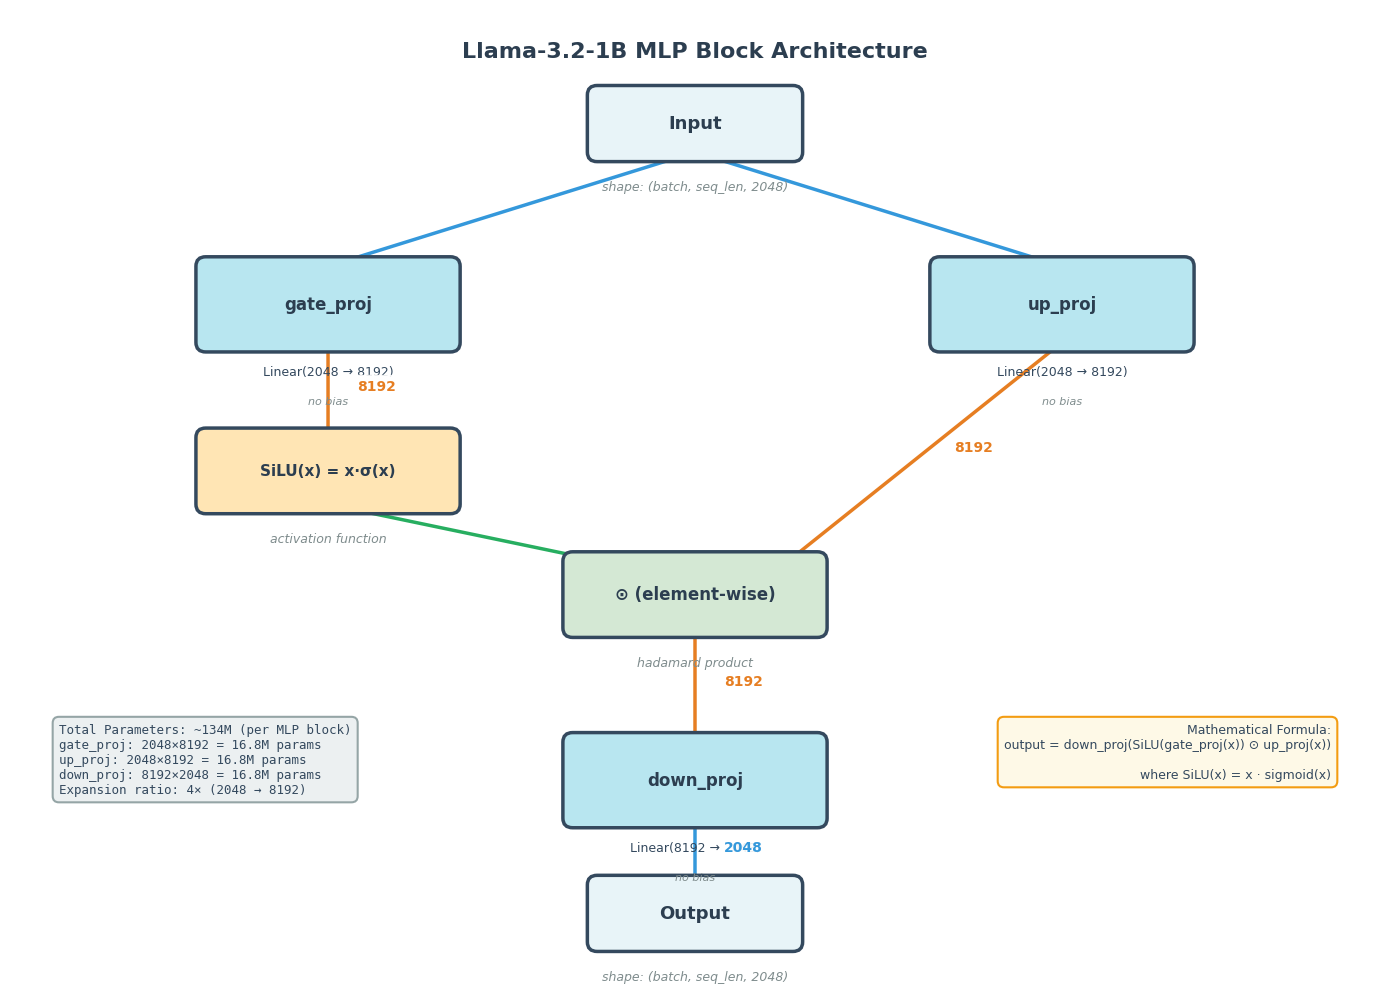

In [2]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 14)
ax.set_ylim(0, 10)
ax.axis('off')

colors = {
    'input': '#E8F4F8',
    'linear': '#B8E6F0',
    'activation': '#FFE5B4',
    'multiply': '#D4E8D4',
    'output': '#E8F4F8',
    'text': '#2C3E50'
}

def draw_box(ax, x, y, width, height, text, color, fontsize=12, bold=False):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.1",
        edgecolor='#34495E',
        facecolor=color,
        linewidth=2.5,
        zorder=2
    )
    ax.add_patch(box)
    weight = 'bold' if bold else 'normal'
    ax.text(x + width/2, y + height/2, text,
            ha='center', va='center',
            fontsize=fontsize, color=colors['text'],
            weight=weight, zorder=3)
    return (x + width/2, y)

def draw_arrow(ax, x1, y1, x2, y2, label='', style='solid', color='#34495E', linewidth=2.5):
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        arrowstyle='->,head_width=0.4,head_length=0.6',
        color=color,
        linewidth=linewidth,
        linestyle=style,
        zorder=1
    )
    ax.add_patch(arrow)
    if label:
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x + 0.3, mid_y, label,
                fontsize=10, color=color,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='none', alpha=0.9),
                weight='bold', zorder=4)

input_x, input_y = 6, 8.5
draw_box(ax, input_x, input_y, 2, 0.6, 'Input', colors['input'], fontsize=13, bold=True)
ax.text(7, input_y - 0.4, 'shape: (batch, seq_len, 2048)', ha='center', fontsize=9, color='#7F8C8D', style='italic')

gate_x, gate_y = 2, 6.5
draw_box(ax, gate_x, gate_y, 2.5, 0.8, 'gate_proj', colors['linear'], fontsize=12, bold=True)
ax.text(gate_x + 1.25, gate_y - 0.35, 'Linear(2048 → 8192)', ha='center', fontsize=9, color='#34495E')
ax.text(gate_x + 1.25, gate_y - 0.65, 'no bias', ha='center', fontsize=8, color='#7F8C8D', style='italic')

up_x, up_y = 9.5, 6.5
draw_box(ax, up_x, up_y, 2.5, 0.8, 'up_proj', colors['linear'], fontsize=12, bold=True)
ax.text(up_x + 1.25, up_y - 0.35, 'Linear(2048 → 8192)', ha='center', fontsize=9, color='#34495E')
ax.text(up_x + 1.25, up_y - 0.65, 'no bias', ha='center', fontsize=8, color='#7F8C8D', style='italic')

draw_arrow(ax, 7, input_y, gate_x + 1.25, gate_y + 0.8, label='', color='#3498DB')
draw_arrow(ax, 7, input_y, up_x + 1.25, up_y + 0.8, label='', color='#3498DB')

silu_x, silu_y = 2, 4.8
draw_box(ax, silu_x, silu_y, 2.5, 0.7, 'SiLU(x) = x·σ(x)', colors['activation'], fontsize=11, bold=True)
ax.text(silu_x + 1.25, silu_y - 0.4, 'activation function', ha='center', fontsize=9, color='#7F8C8D', style='italic')

draw_arrow(ax, gate_x + 1.25, gate_y, silu_x + 1.25, silu_y + 0.7, label='8192', color='#E67E22')

mul_x, mul_y = 5.75, 3.5
draw_box(ax, mul_x, mul_y, 2.5, 0.7, '⊙ (element-wise)', colors['multiply'], fontsize=12, bold=True)
ax.text(mul_x + 1.25, mul_y - 0.4, 'hadamard product', ha='center', fontsize=9, color='#7F8C8D', style='italic')

draw_arrow(ax, silu_x + 1.25, silu_y, mul_x + 0.3, mul_y + 0.7, label='', color='#27AE60')
draw_arrow(ax, up_x + 1.25, up_y, mul_x + 2.2, mul_y + 0.7, label='8192', color='#E67E22')

down_x, down_y = 5.75, 1.5
draw_box(ax, down_x, down_y, 2.5, 0.8, 'down_proj', colors['linear'], fontsize=12, bold=True)
ax.text(down_x + 1.25, down_y - 0.35, 'Linear(8192 → 2048)', ha='center', fontsize=9, color='#34495E')
ax.text(down_x + 1.25, down_y - 0.65, 'no bias', ha='center', fontsize=8, color='#7F8C8D', style='italic')

draw_arrow(ax, mul_x + 1.25, mul_y, down_x + 1.25, down_y + 0.8, label='8192', color='#E67E22')

output_x, output_y = 6, 0.2
draw_box(ax, output_x, output_y, 2, 0.6, 'Output', colors['output'], fontsize=13, bold=True)
ax.text(7, output_y - 0.4, 'shape: (batch, seq_len, 2048)', ha='center', fontsize=9, color='#7F8C8D', style='italic')

draw_arrow(ax, down_x + 1.25, down_y, 7, output_y + 0.6, label='2048', color='#3498DB')

ax.text(7, 9.5, 'Llama-3.2-1B MLP Block Architecture', 
        ha='center', fontsize=16, weight='bold', color='#2C3E50')

info_text = (
    'Total Parameters: ~134M (per MLP block)\n'
    'gate_proj: 2048×8192 = 16.8M params\n'
    'up_proj: 2048×8192 = 16.8M params\n'
    'down_proj: 8192×2048 = 16.8M params\n'
    'Expansion ratio: 4× (2048 → 8192)'
)
ax.text(0.5, 2.5, info_text, fontsize=9, color='#34495E',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#ECF0F1', edgecolor='#95A5A6', linewidth=1.5),
        verticalalignment='top', family='monospace')

formula_text = (
    'Mathematical Formula:\n'
    'output = down_proj(SiLU(gate_proj(x)) ⊙ up_proj(x))\n\n'
    'where SiLU(x) = x · sigmoid(x)'
)
ax.text(13.5, 2.5, formula_text, fontsize=9, color='#34495E',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#FEF9E7', edgecolor='#F39C12', linewidth=1.5),
        verticalalignment='top', ha='right')

plt.tight_layout()
plt.savefig('llama_mlp_architecture.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


## Key Features of Llama MLP

1. **SwiGLU Architecture**: Uses gated linear units with SiLU activation
2. **Parallel Projections**: gate_proj and up_proj process input in parallel
3. **Element-wise Gating**: SiLU-activated gate multiplies with up projection
4. **4× Expansion**: Hidden dimension expands from 2048 to 8192
5. **No Bias Terms**: All linear layers have bias=False for efficiency


In [3]:
import torch
import torch.nn as nn

class LlamaMLP(nn.Module):
    def __init__(self, hidden_size=2048, intermediate_size=8192):
        super().__init__()
        self.gate_proj = nn.Linear(hidden_size, intermediate_size, bias=False)
        self.up_proj = nn.Linear(hidden_size, intermediate_size, bias=False)
        self.down_proj = nn.Linear(intermediate_size, hidden_size, bias=False)
        self.act_fn = nn.SiLU()
    
    def forward(self, x):
        gate = self.act_fn(self.gate_proj(x))
        up = self.up_proj(x)
        return self.down_proj(gate * up)

mlp = LlamaMLP()
print(mlp)
print(f"\nTotal parameters: {sum(p.numel() for p in mlp.parameters()):,}")


LlamaMLP(
  (gate_proj): Linear(in_features=2048, out_features=8192, bias=False)
  (up_proj): Linear(in_features=2048, out_features=8192, bias=False)
  (down_proj): Linear(in_features=8192, out_features=2048, bias=False)
  (act_fn): SiLU()
)

Total parameters: 50,331,648


In [4]:
x = torch.randn(1, 128, 2048)
output = mlp(x)
print(f"Input shape:  {x.shape}")
print(f"Output shape: {output.shape}")


Input shape:  torch.Size([1, 128, 2048])
Output shape: torch.Size([1, 128, 2048])
